## Thailand Data Exploration

#### API: https://covid19.ddc.moph.go.th/en/api

In [1]:
import requests
import json

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_dark"

import matplotlib.pyplot as plt
import seaborn as sns

### request data (json format)

In [2]:
daily_case_url = "https://covid19.th-stat.com/api/open/today"
time_series_url = "https://covid19.th-stat.com/api/open/timeline"
case_detail_url = "https://covid19.th-stat.com/api/open/cases"

In [3]:
daily_case = requests.get(daily_case_url).json()
time_series = requests.get(time_series_url).json()
case_detail = requests.get(case_detail_url).json()

In [4]:
daily_case

{'Confirmed': 3317,
 'Recovered': 3142,
 'Hospitalized': 117,
 'Deaths': 58,
 'NewConfirmed': 5,
 'NewRecovered': 7,
 'NewHospitalized': -2,
 'NewDeaths': 0,
 'UpdateDate': '02/08/2020 11:34',
 'Source': 'https://covid19.th-stat.com/',
 'DevBy': 'https://www.kidkarnmai.com/',
 'SeverBy': 'https://smilehost.asia/'}

#### `time_series` json example

```python
{'UpdateDate': '02/08/2020 11:34',
 'Source': 'https://covid19.th-stat.com/',
 'DevBy': 'https://www.kidkarnmai.com/',
 'SeverBy': 'https://smilehost.asia/',
 'Data': [{'Date': '01/01/2020',
   'NewConfirmed': 0,
   'NewRecovered': 0,
   'NewHospitalized': 0,
   'NewDeaths': 0,
   'Confirmed': 0,
   'Recovered': 0,
   'Hospitalized': 0,
   'Deaths': 0},
  {'Date': '01/02/2020',
   'NewConfirmed': 0,
   'NewRecovered': 0,
   'NewHospitalized': 0,
   'NewDeaths': 0,
   'Confirmed': 0,
   'Recovered': 0,
   'Hospitalized': 0,
   'Deaths': 0},
  {'Date': '01/03/2020',
          ...
   ]
```

ใช้ `timeseries['Data']` ไปเป็น Dataframe ได้

### time series json to data frame

In [5]:
df = pd.DataFrame(time_series['Data'])
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
0,2020-01-01,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
210,2020-07-29,1,0,1,0,3298,3111,129,58
211,2020-07-30,6,0,6,0,3304,3111,135,58
212,2020-07-31,6,14,-8,0,3310,3125,127,58
213,2020-08-01,2,10,-8,0,3312,3135,119,58


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             215 non-null    datetime64[ns]
 1   NewConfirmed     215 non-null    int64         
 2   NewRecovered     215 non-null    int64         
 3   NewHospitalized  215 non-null    int64         
 4   NewDeaths        215 non-null    int64         
 5   Confirmed        215 non-null    int64         
 6   Recovered        215 non-null    int64         
 7   Hospitalized     215 non-null    int64         
 8   Deaths           215 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 15.2 KB


#### `case_detail` example

```python

{'Data': [{'ConfirmDate': '2020-08-01 00:00:00',
   'No': '3312',
   'Age': 29,
   'Gender': 'ชาย',
   'GenderEn': 'Male',
   'Nation': 'Serbia',
   'NationEn': None,
   'Province': 'บุรีรัมย์',
   'ProvinceId': 28,
   'District': '',
   'ProvinceEn': 'Buriram',
   'Detail': None,
   'StatQuarantine': 1},
  {'ConfirmDate': '2020-08-01 00:00:00',
   'No': '3311',
   'Age': 41,
   'Gender': 'ชาย',
   'GenderEn': 'Male',
   'Nation': 'Finland',
   'NationEn': None,
   'Province': 'กรุงเทพมหานคร',
   'ProvinceId': 1,
   'District': '',
   'ProvinceEn': 'Bangkok',
   'Detail': None,
   'StatQuarantine': 1},
  {'ConfirmDate': '2020-07-31 00:00:00',
   'No': '3310',
   ...
]
```

> ใช้ `case_detail['data']` แปลงเป็น dataframe ได้

> ข้อมูลทั้งภาษาไทยและอังกฤษ

### case detail json to data frame

In [8]:
case_df = pd.DataFrame(case_detail['Data'])
case_df

,ConfirmDate,No,Age,Gender,GenderEn,Nation,NationEn,Province,ProvinceId,District,ProvinceEn,Detail,StatQuarantine
0,2020-08-01 00:00:00,3312,29.0,ชาย,Male,Serbia,None,บุรีรัมย์,28,,Buriram,None,1
1,2020-08-01 00:00:00,3311,41.0,ชาย,Male,Finland,None,กรุงเทพมหานคร,1,,Bangkok,None,1
2,2020-07-31 00:00:00,3310,28.0,ชาย,Male,Thailand,None,ฉะเชิงเทรา,8,,Chachoengsao,None,1
3,2020-07-31 00:00:00,3309,52.0,ชาย,Male,Thailand,None,สมุทรปราการ,60,,Samut Prakan,None,1
4,2020-07-31 00:00:00,3308,24.0,ชาย,Male,Thailand,None,ชลบุรี,9,,Chonburi,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,2020-01-24 00:00:00,5,66.0,หญิง,Female,China,None,นนทบุรี,24,,Nonthaburi,None,0
3309,2020-01-22 00:00:00,4,68.0,ชาย,Male,China,None,กรุงเทพมหานคร,1,,Bangkok,None,0
3310,2020-01-22 00:00:00,3,73.0,หญิง,Female,Thailand,None,นครปฐม,19,เมือง,Nakhon Pathom,None,0
3311,2020-01-17 00:00:00,2,74.0,หญิง,Female,China,None,กรุงเทพมหานคร,1,,Bangkok,None,0


In [9]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ConfirmDate     3313 non-null   object 
 1   No              3312 non-null   object 
 2   Age             3313 non-null   float64
 3   Gender          3313 non-null   object 
 4   GenderEn        3313 non-null   object 
 5   Nation          3313 non-null   object 
 6   NationEn        76 non-null     object 
 7   Province        3313 non-null   object 
 8   ProvinceId      3313 non-null   int64  
 9   District        3313 non-null   object 
 10  ProvinceEn      3313 non-null   object 
 11  Detail          0 non-null      object 
 12  StatQuarantine  3313 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 336.6+ KB


In [10]:
case_df[~case_df["NationEn"].isna()]

,ConfirmDate,No,Age,Gender,GenderEn,Nation,NationEn,Province,ProvinceId,District,ProvinceEn,Detail,StatQuarantine
312,2020-05-08 00:00:00,3000,0.0,หญิง,Female,Burma,Burmese,สงขลา,58,สะเดา,Songkhla,None,1
313,2020-05-08 00:00:00,2999,30.0,หญิง,Female,Burma,Burmese,สงขลา,58,สะเดา,Songkhla,None,1
325,2020-05-04 00:00:00,2987,10.0,ชาย,Male,Burma,Burmese,สงขลา,58,สะเดา,Songkhla,None,1
346,2020-04-04 00:00:00,None,51.0,ชาย,Male,สหราชอาณาจักร,British,กรุงเทพมหานคร,1,,Bangkok,None,0
406,2020-04-25 00:00:00,2907,45.0,ชาย,Male,Burma,Burmese,สงขลา,58,สะเดา,Songkhla,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2020-03-22 00:00:00,594,58.0,ชาย,Male,ไม่ทราบ,Unknown,กรุงเทพมหานคร,1,,Bangkok,None,0
2723,2020-03-22 00:00:00,590,20.0,หญิง,Female,ไม่ทราบ,Unknown,กรุงเทพมหานคร,1,,Bangkok,None,0
2817,2020-03-22 00:00:00,490,66.0,ชาย,Male,Switzerland,Swiss,เชียงใหม่,14,สันทราย,Chiang Mai,None,0
2918,2020-03-21 00:00:00,390,26.0,หญิง,Female,Switzerland,Swiss,ภูเก็ต,42,กะทู้,Phuket,None,0


## Visualization

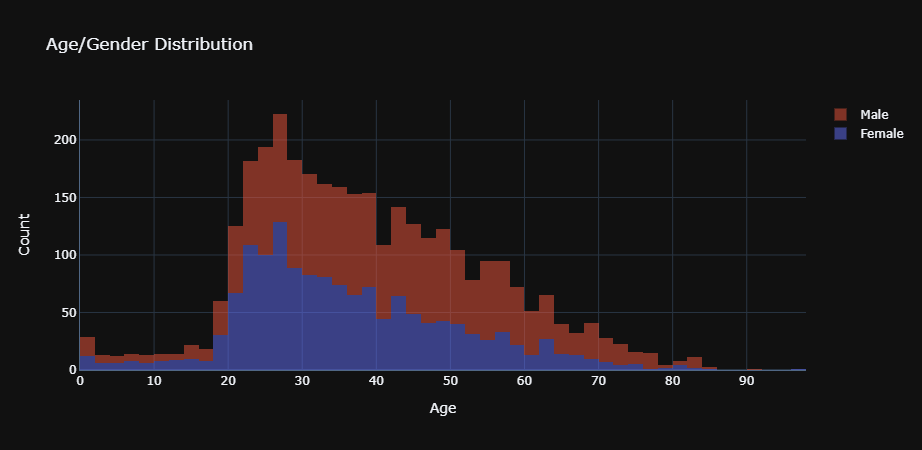

In [43]:
fig = go.Figure()

for gender, group in case_df.groupby("GenderEn"):
    fig.add_trace(go.Histogram(x=group['Age'], name=gender))


fig.update_layout(xaxis_title_text="Age", 
                  yaxis_title_text="Count",
                  title_text="Age/Gender Distribution")    
fig.update_layout(barmode='stack')
fig.update_traces(opacity=0.5)
fig.show()